## Data Cleaning ##

Cleaning of the airline data to get the data for building models

In [11]:
# Include all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno
import datetime

import seaborn as sns

Load the FlightDelays.csv data which has the info about all the flight delays in the following quarters: 2018 Q1-Q4, 2019 Q1-Q2

In [2]:
flight_delays = pd.read_csv('FlightDelays.csv', low_memory=False)
flight_delays.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,Route,ORIGIN,...,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PASSENGERS,EMPFULL,EMPPART,EMPTOTAL,EMPFTE,NET_INCOME,OP_REVENUES
0,2018,1,1,1,1,2018-01-01,9E,3331,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
1,2018,1,1,1,1,2018-01-01,9E,3940,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
2,2018,1,1,2,2,2018-01-02,9E,3409,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
3,2018,1,1,2,2,2018-01-02,9E,3940,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
4,2018,1,1,3,3,2018-01-03,9E,3353,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25


Now, let's use missingno (A visualization framework for missing numbers)

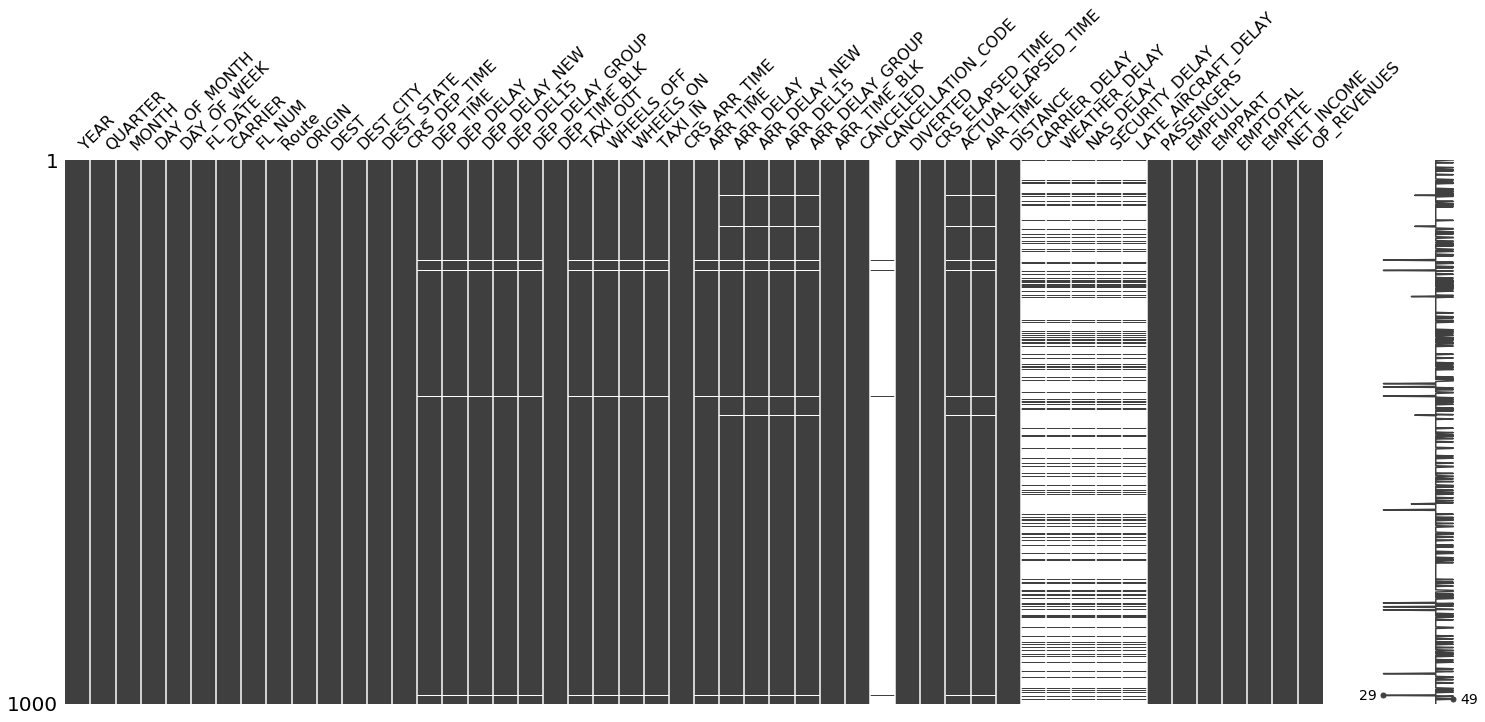

In [3]:
msno.matrix(flight_delays.sample(1000))

We can see that the CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY and LATE_AIRCRAFT_DELAY are almost completely unfilled. We can assume that the these delays are not observed and impute them with value 0. Since these are important in determining the arrival/departure delays, we are not removing these fields.

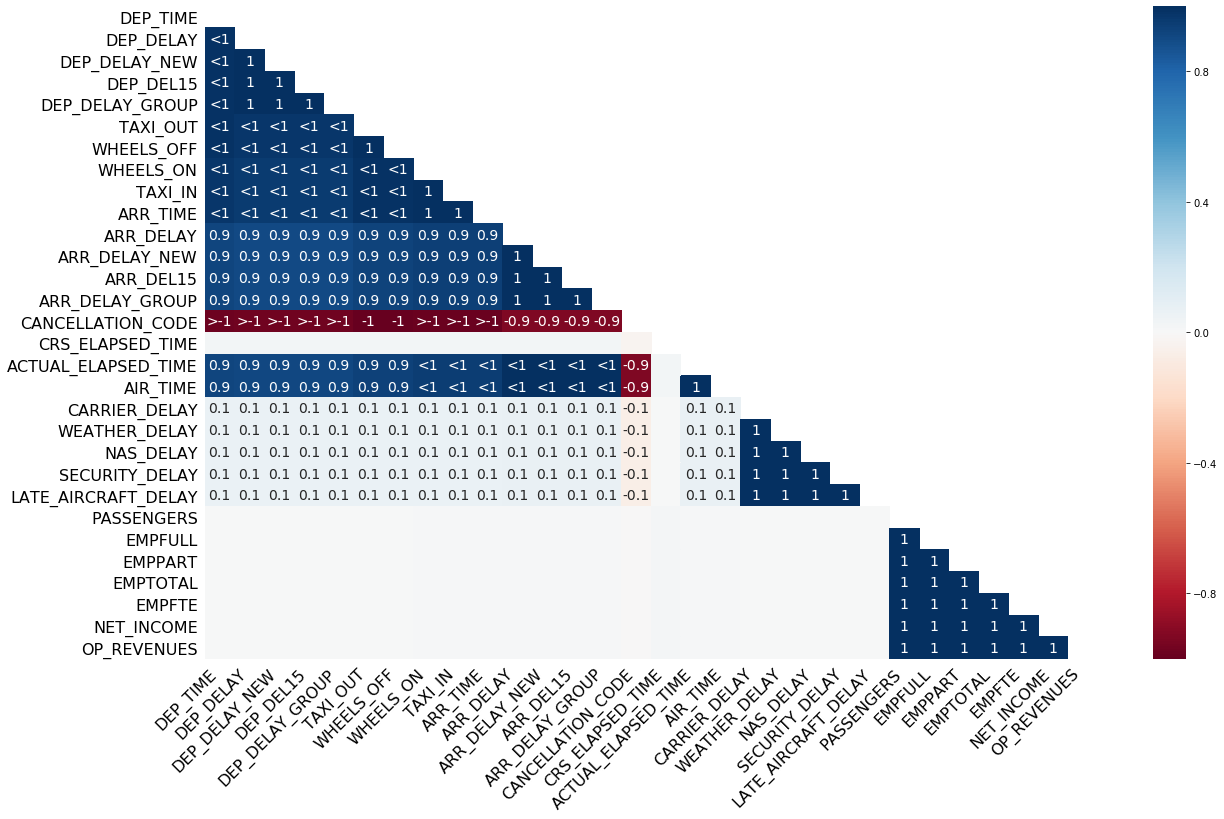

In [4]:
msno.heatmap(flight_delays)

Since cancellations wouldn't give a proper information regarding the arrival or departure delays, we intend to remove these from the data.

In [5]:
flight_delays = flight_delays[flight_delays.CANCELED == 0]
flight_delays.drop(['CANCELED', 'CANCELLATION_CODE'], axis=1, inplace=True)

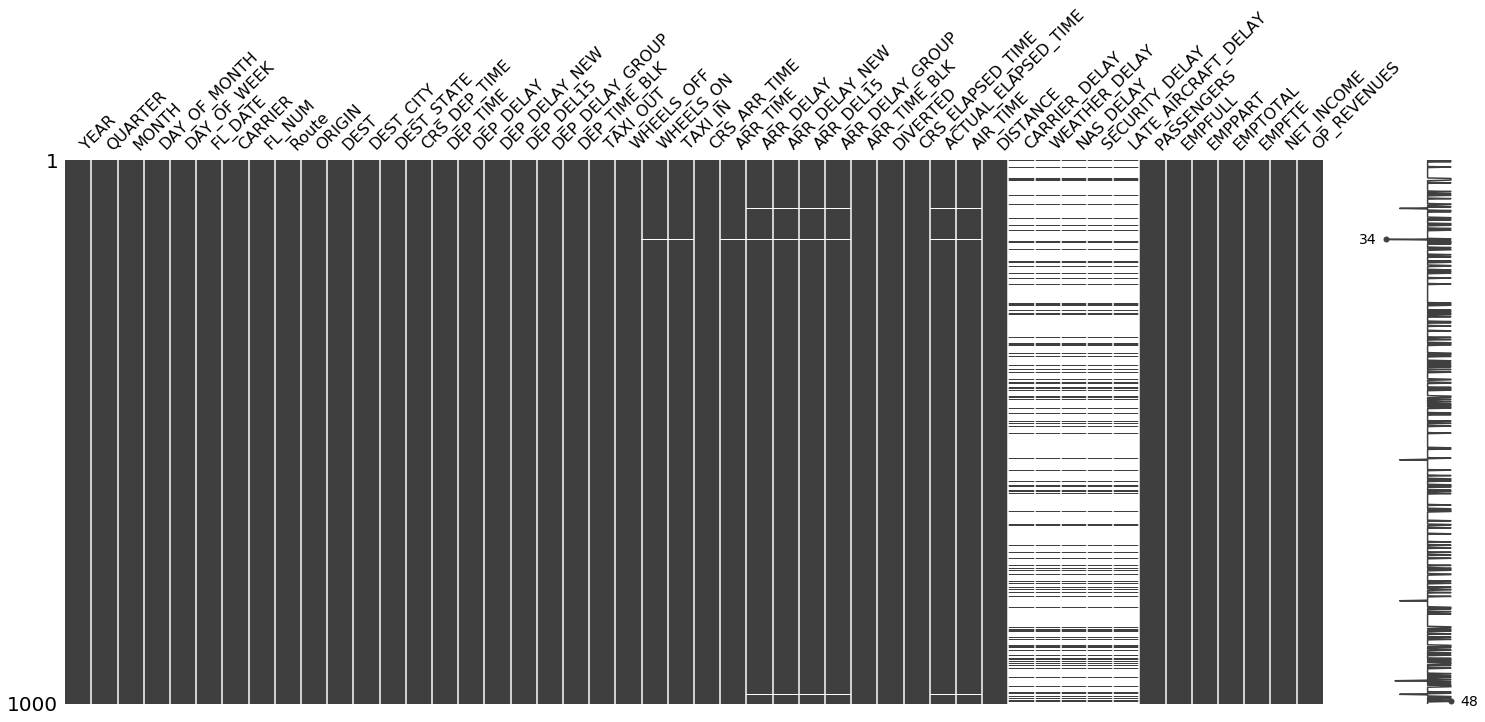

In [6]:
msno.matrix(flight_delays.sample(1000))

We can further see that all the missing values in DEP_DELAY is because that there is no delay i.e., delay is 0. Therefore, impute/fill all the missing values in DEP_DELAY and related column values to 0

In [7]:
flight_delays['DEP_DELAY'].fillna(0, inplace=True)
flight_delays['DEP_DELAY_NEW'].fillna(0, inplace=True)
flight_delays['DEP_DEL15'].fillna(0, inplace=True)
flight_delays['DEP_DELAY_GROUP'].fillna(0, inplace=True)

Convert all the number to datetime format using the function below:

In [8]:
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400:
            chaine = 0
        
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure

In [9]:
flight_delays['DEP_TIME'] = flight_delays['DEP_TIME'].apply(format_heure)
flight_delays['CRS_DEP_TIME'] = flight_delays['CRS_DEP_TIME'].apply(format_heure)
flight_delays['CRS_ARR_TIME'] = flight_delays['CRS_ARR_TIME'].apply(format_heure)
flight_delays['ARR_TIME'] = flight_delays['ARR_TIME'].apply(format_heure)

Now, we draw a correlation matrix to identify which columns to remove from the dataset.

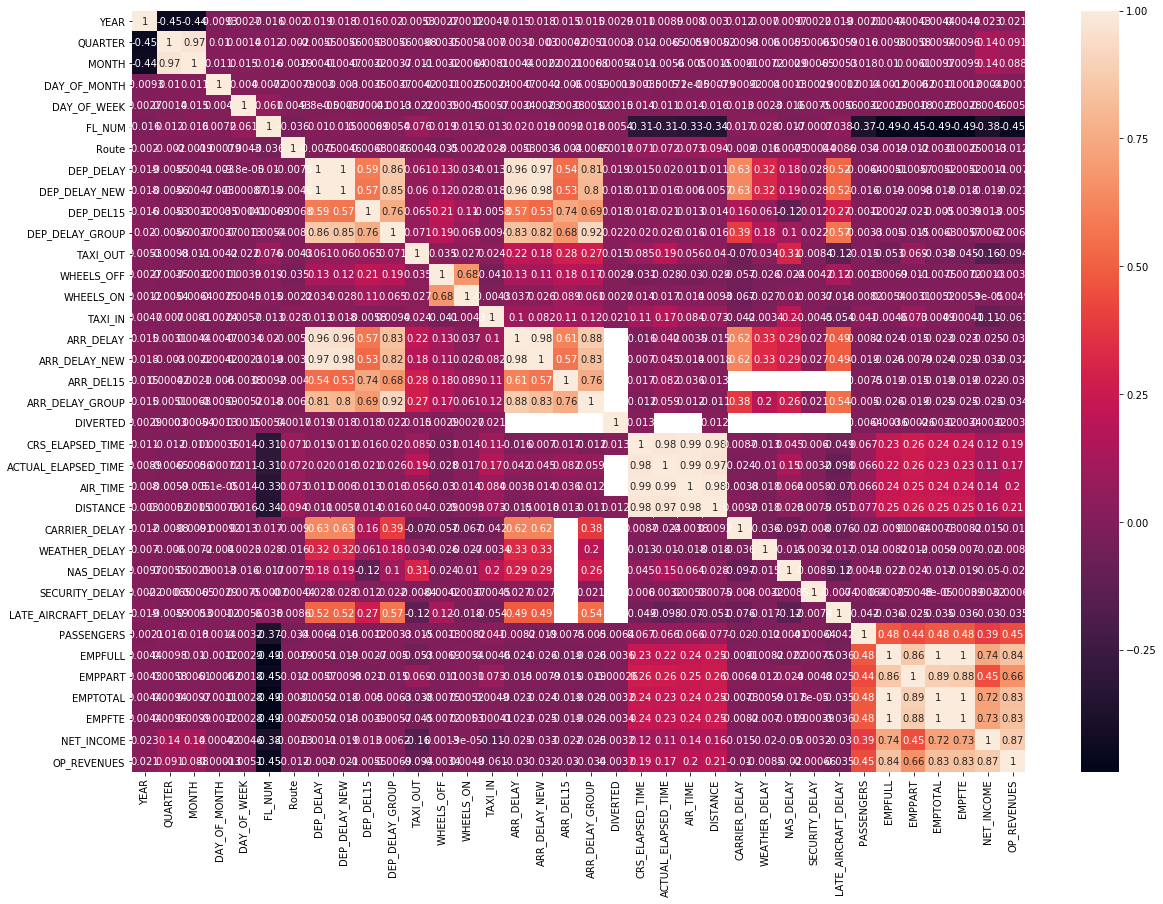

In [12]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flight_delays.corr(),annot = True)
plt.show()

DISTANCE, AIR_TIME, CRS_ELAPSED_TIME, ACTUAL_ELAPSED_TIME, EMPFULL, EMPPART, EMPFTE are all correlated i.e., they are dependent on each other. We decided to keep DISTANCE and remove the others since DISTANCE has the most non-null entries out of all these features. 

In [13]:
# keep variable DISTANCE
variables_to_remove = ['AIR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'EMPFULL', 'EMPPART', 'EMPFTE']
flight_delays.drop(variables_to_remove, axis = 1, inplace = True)

Similarly, ARR_DELAY is correlated to ARR_DELAY_GROUP and ARR_DELAY_NEW.
and DEP_DELAY is correlated to DEP_DELAY_GROUP and DEP_DELAY_NEW.

In [14]:
# keep variable ARR_DELAY
# keep variable DEP_DELAY
variables_to_remove = ['DEP_DELAY_GROUP', 'DEP_DELAY_NEW', 'ARR_DELAY_GROUP', 'ARR_DELAY_NEW']
flight_delays.drop(variables_to_remove, axis = 1, inplace = True)

ARR_TIME is correlated to CRS_ARR_TIME, WHEELS_ON and DEP_TIME is correlated to CRS_DEP_TIME, WHEELS_OFF

In [15]:
# keep ARR_TIME
# keep DEP_TIME
variables_to_remove = ['CRS_ARR_TIME', 'CRS_DEP_TIME', 'WHEELS_ON', 'WHEELS_OFF']
flight_delays.drop(variables_to_remove, axis = 1, inplace = True)

EMPTOTAL is correlated to NET_INCOME and OP_REVENUES 

In [17]:
# keep EMPTOTAL
variables_to_remove = ['NET_INCOME', 'OP_REVENUES']
flight_delays.drop(variables_to_remove, axis = 1, inplace = True)

Arrival and Departure delays are dependent on each other. So, we can remove all the departure delay related features.

In [18]:
# Arrival times and Departure times are correlated
variables_to_remove = ['DEP_TIME', 'DEP_DELAY', 'DEP_DEL15']
flight_delays.drop(variables_to_remove, axis = 1, inplace = True)

ARR_DEL15 and DELAY_LEVEL are correlated. Remove ARR_DEL15

In [19]:
# keep DELAY_LEVEL
variables_to_remove = ['ARR_DEL15']
flight_delays.drop(variables_to_remove, axis = 1, inplace = True)

Remove all the unnecessary variables.

In [20]:
variables_to_remove = ['ARR_TIME_BLK', 'DEP_TIME_BLK', 'YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_NUM', 'DEST_CITY', 'DEST_STATE']
flight_delays.drop(variables_to_remove, axis = 1, inplace = True)

Plot the correlation matrix again to see if any of the features are still correlated and needed to remove.

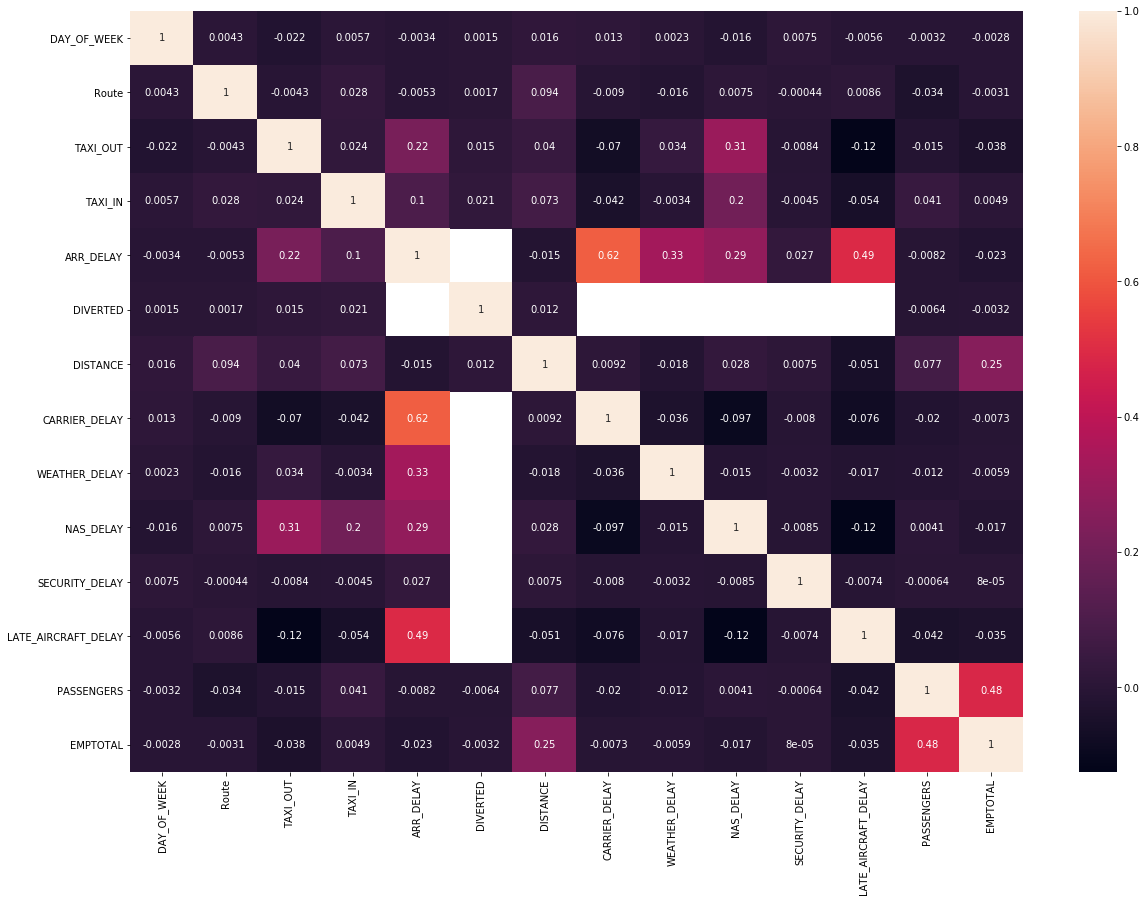

In [21]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flight_delays.corr(),annot = True)
plt.show()

In [24]:
flight_delays.isnull().sum()

DAY_OF_WEEK                  0
FL_DATE                      0
CARRIER                      0
Route                        0
ORIGIN                       0
DEST                         0
TAXI_OUT                     0
TAXI_IN                      0
ARR_TIME                     0
ARR_DELAY                    0
DIVERTED                     0
DISTANCE                     0
CARRIER_DELAY          8587852
WEATHER_DELAY          8587852
NAS_DELAY              8587852
SECURITY_DELAY         8587852
LATE_AIRCRAFT_DELAY    8587852
PASSENGERS                   0
EMPTOTAL                     0
dtype: int64

Finally, remove all the null items in the data.

In [23]:
flight_delays.dropna(subset = ['TAXI_IN', 'PASSENGERS', 'ARR_DELAY'], inplace=True)

Fill the missing delay values with 0.

In [25]:
flight_delays.fillna(0, inplace=True)
flight_delays.shape

(10668316, 19)

Save the clean data into a csv file for model building.

In [ ]:
flight_delays.to_csv('flight_delays_clean2.csv', encoding='utf-8', index=False)